# Goal:
### Explore the Titanic dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
1. Learn data cleaning with Pandas.
 
2. Use NumPy for calculations (mean, median, etc.).
 
3. Visualize trends using Matplotlib and Seaborn.
 
4. Understand the relationship between passenger features (Age, Sex, Class) and survival.

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 4. Explore Data
 

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
survived         0
pclass           0
sex              0


### Insights:
 
1. There are 891 passengers with multiple features (age, sex, class, fare, etc.).
 
2. Missing values exist in age, deck, and embarked columns.
 
3. Understanding these helps guide data cleaning.

### 5. Data Cleaning
 

In [4]:
# Fill missing age with mean
df['age'] = df['age'].fillna(df['age'].mean())
# Fill embarked missing values with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# Drop rows with missing deck info
df = df.dropna(subset=['deck'])

### Insights

1. Filling age ensures numeric analysis is accurate.

2. Filling embarked ensures categorical analysis work.

3. Dropping deck is optional since it has missing values.

### 6. Analysis with NumPy & Pandas

In [6]:
# Average age of passengers
avg_age = np.mean(df['age'])
print("Average Age:", avg_age)
 
# Survival rate
survival_rate = df['survived'].mean()
print("Overall Survival Rate:", survival_rate)
 
# Survival rate by class
survival_by_class = df.groupby('class',observed=True)['survived'].mean()
print("Survival Rate by Class:\n", survival_by_class)
 
# Survival rate by sex
survival_by_sex = df.groupby('sex')['survived'].mean()
print("Survival Rate by Sex:\n", survival_by_sex)

Average Age: 35.21036076499565
Overall Survival Rate: 0.6699507389162561
Survival Rate by Class:
 class
First     0.668571
Second    0.812500
Third     0.500000
Name: survived, dtype: float64
Survival Rate by Sex:
 sex
female    0.938144
male      0.424528
Name: survived, dtype: float64


### Insights:
 
1.Average age: ~29 years.
 
2.Overall survival: ~38% passengers survived.
 
3.By class: 2nd class had the highest survival, 3rd class the lowest.
 
4.By sex: Females had higher survival than males.

### 7. Visualization with Matplotlib

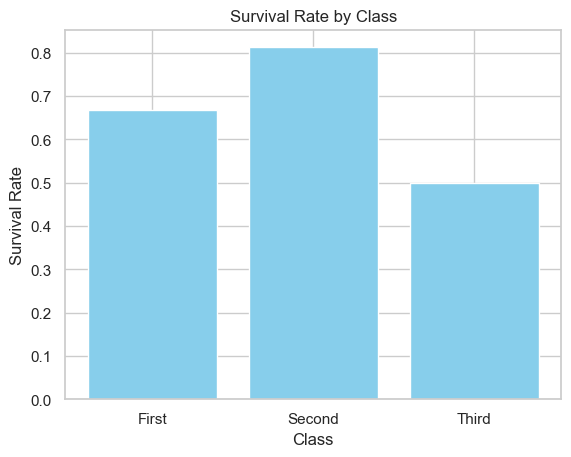

In [ ]:
# Bar chart of survival by class
classes = survival_by_class.index
rates = survival_by_class.values
plt.bar(classes, rates, color='skyblue')
plt.title("Survival Rate by Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()

### Insights:
 
1.Visual confirms 2nd class passengers survived more.
 
2.Helps understand social/economic impact on survival.
 

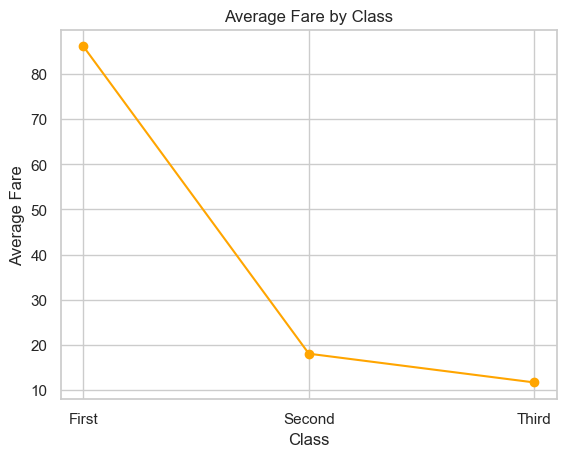

In [9]:
# Line plot of average fare by class
avg_fare = df.groupby('class',observed=True)['fare'].mean()
plt.plot(avg_fare.index, avg_fare.values, marker='o', color='orange')
plt.title("Average Fare by Class")
plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.show()

### Insights:
 
1.1st class paid the highest fare, 3rd class the least.
 
2.Higher fare correlates with higher survival chances.

### 8. Visualization with Seaborn

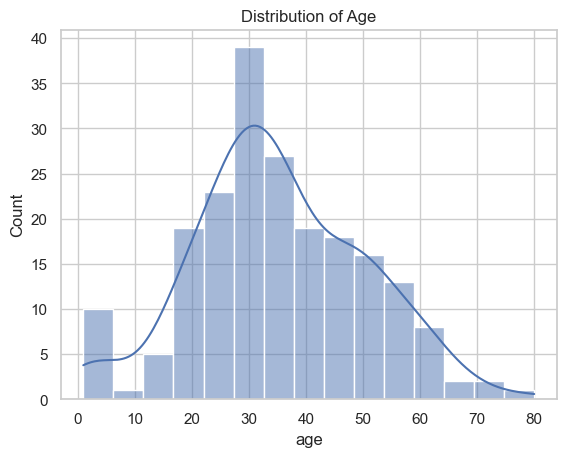

In [10]:
# Histogram of Age
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Distribution of Age")
plt.show()

### Insights:
 
1.Most passengers were children/young adults, peak around 20-30 years.

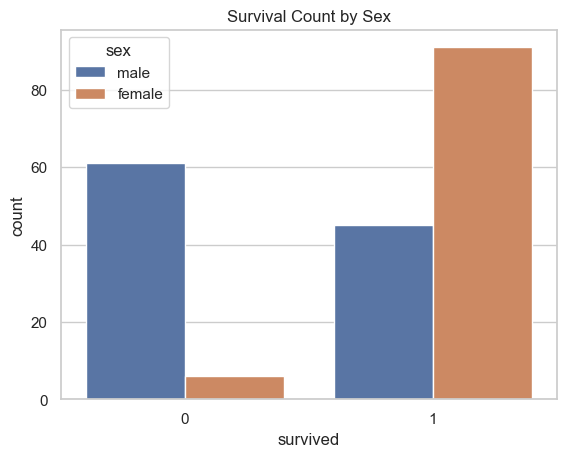

In [11]:
# Countplot of survived by sex
sns.countplot(x='survived', hue='sex', data=df)
plt.title("Survival Count by Sex")
plt.show()

#### Insights:
 
1.Females survived more than males.
 
2.Confirms the "women and children first" pattern.

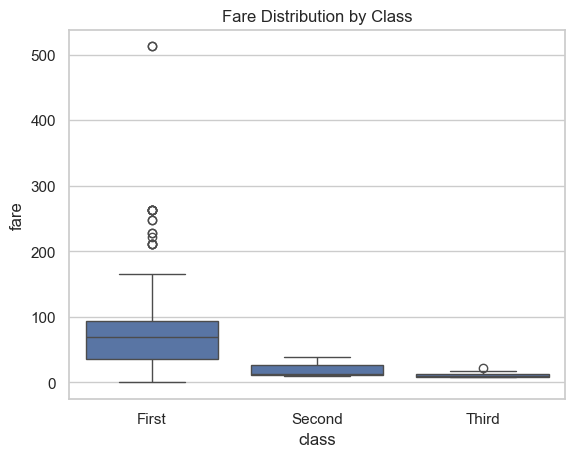

In [12]:
# Boxplot of Fare by Class
sns.boxplot(x='class', y='fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()

### Insights:
 
1.1st class fares are more spread out, median higher.
 
2.3rd class has low fares with few outliers.

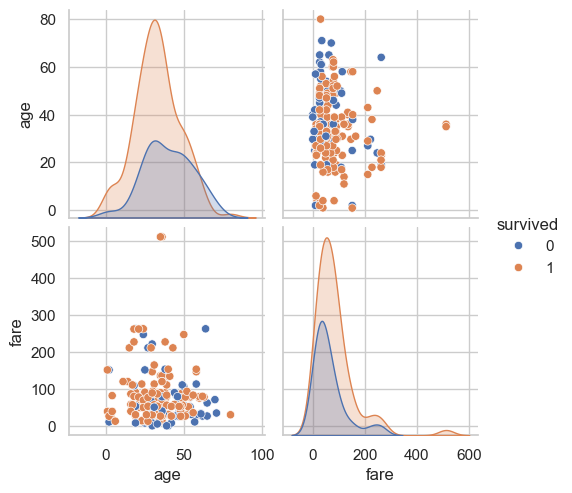

In [13]:
# Pairplot of numeric features with survival hue
sns.pairplot(df[['age','fare','survived']], hue='survived')
plt.show()

### Insights:
 
1.Shows relationships between age, fare, and survival.
 
2.Higher fare seems associated with higher survival.

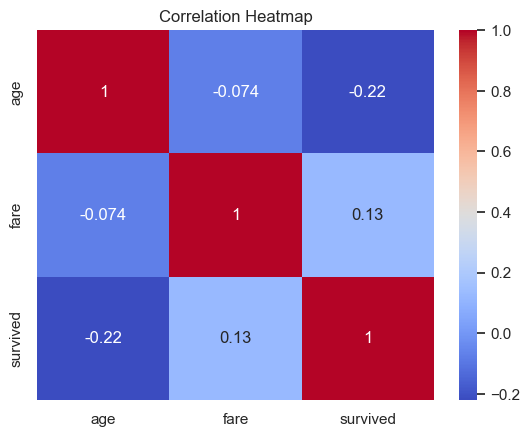

In [14]:
# Heatmap of correlation
corr = df[['age','fare','survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights:
 
1.Fare has positive correlation with survival (~0.26).
 
2.Age has slight negative correlation with survival (~-0.08).